<a href="https://colab.research.google.com/github/Smoow/heart-studies/blob/master/trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

db = pd.read_csv("heart.csv")
db

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [0]:
db.age.describe()     # Média = 54.3 anos / Desvio Padrão =~ 9 anos / Idade Mínima (no estudo) = 29 / Idade Máxima (no estudo) = 77

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [0]:
db.sex.describe()     # Sendo que Feminino = 0 e Masculino = 1, temos que a maioria dos acidentes (68%) ocorreram com homens
                      # e, consequentemente, a minoria (32%) dos acidentes ocorreram com mulheres.

count    303.000000
mean       0.683168
std        0.466011
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

In [0]:
db.sex.value_counts() # Aqui, nota-se que 207 casos foram registrados em homens e 96 casos em mulheres
                      # Justificando a afirmação do código acima.

1    207
0     96
Name: sex, dtype: int64

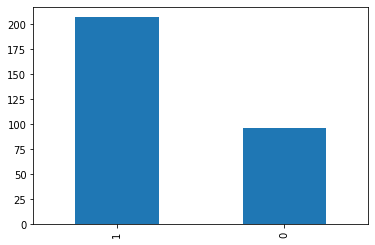

In [0]:
db.sex.value_counts().plot.bar() # Com este gráfico, fica mais fácil a visualização do argumento de que os acidentes em
                                 # sua maioria nos homens


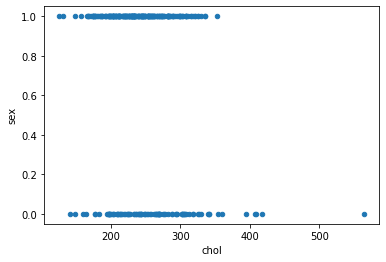

In [0]:
db.plot.scatter(x = 'chol', y = 'sex') # Aqui vêmos um gráfico que mostra a média de colesterol das pessoas e
                                       # vemos que, apesar dos homens serem mais afetados, a média do colesterol deles
                                       # é um pouco menor que das mulheres.

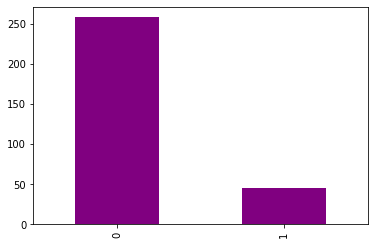

In [0]:
db.fbs.value_counts().plot.bar(color="purple") # Neste gráfico, observamos que a maioria dos pacientes que estavam com uma maior porcentagem de açúcar no sangue são mulheres.

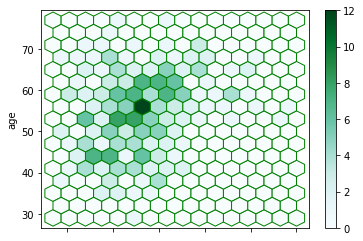

In [0]:
db.plot.hexbin(x = 'trestbps', y = 'age', gridsize=15, color="green") # Aqui percebemos que os pacientes que entraram no hospital com maior pressão sanguínea estavam na faixa dos 
                                                                      # 50 a 60 anos.

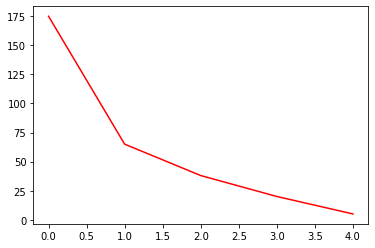

In [0]:
db.ca.value_counts().plot.line(color="red") # isso mostra quantos pacientes tiveram suas veias coloridas (numa intensidade de 0 a 4) pela fluoroscopia

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


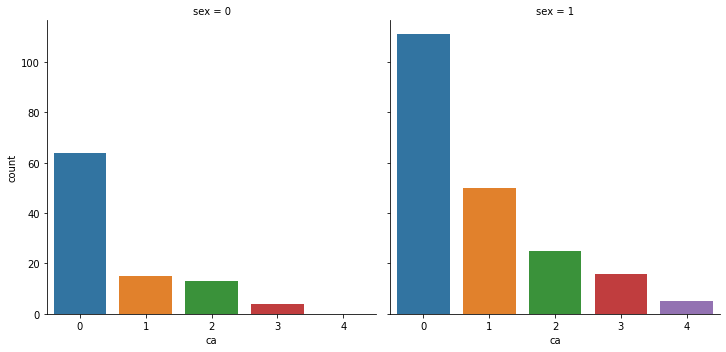

In [0]:
sns.factorplot(x = "ca", col = "sex", kind = "count", data = db)     # relação entre a intensidade da fluoroscopia e o gênero.

In [0]:
db.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

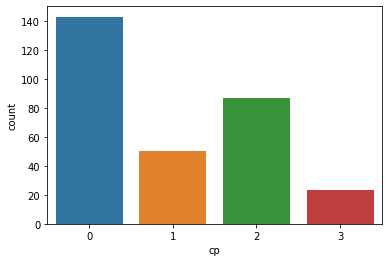

In [0]:
sns.countplot(x = "cp", data = db) # tipo da dor

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


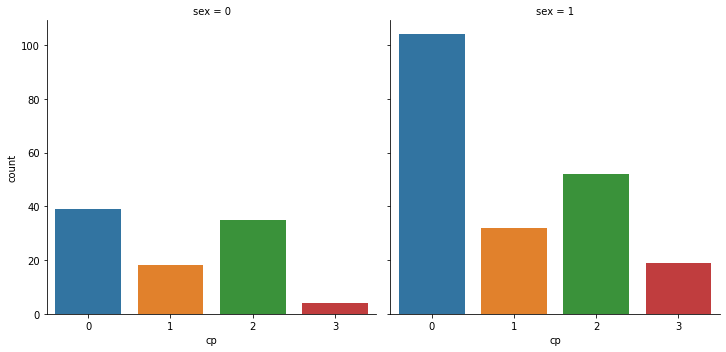

In [0]:
sns.factorplot(x= "cp", col="sex", kind= "count", data = db)

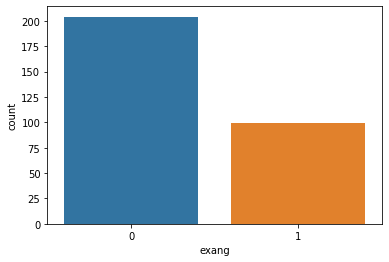

In [0]:
sns.countplot(x = "exang", data = db)

## Roteiro
 1. Escolha uma classe de modelo importando do Scikit.
 2. Escolha os hiperparâmtros do modelo instanciando a classe escolhida em 1.
 3. Organize os dados em uma *feature matrix* e um *target array*.
 4. Ajuste o modelo invocando **fit()**.
 5. Aplique o modelo aos novos dados usando **predict()**.


### Separando a Feature Matrix e Target Array

In [0]:
#3.1 Feature Matrix
X_db = db.loc[: ,  ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal",] ]
X_db.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [0]:
#3.2 Target Array
y_db = db.target
y_db.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB #1. Escolha do modelo
model_bayes = GaussianNB()                 #2. Escolha dos hiperparâmetros e instanciação

In [0]:
#3.3 Separação do Banco de Dados
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_db, y_db, random_state=42)

In [0]:
#4 Ajustando o modelo aos dados
model_bayes.fit(Xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
#5 Fazendo predições em dados novos
y_model_bayes = model_bayes.predict(Xtest)

In [0]:
y_model_bayes

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model_bayes)

0.881578947368421

### Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier       # 1
model_decisiont = DecisionTreeClassifier()                     # 2
                                                      # 3
model_decisiont.fit(Xtrain, ytrain)                            # 4

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# 5
y_model_decisiont = model_decisiont.predict(Xtest)
y_model_decisiont

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [0]:
accuracy_score(ytest, y_model_decisiont)

0.7894736842105263

### Cross-Validation

In [0]:
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
model_neighbors = KNeighborsClassifier(n_neighbors=1)
cross_val_score(model_neighbors, X_db, y_db, cv = 5)

array([0.68852459, 0.45901639, 0.49180328, 0.7       , 0.58333333])

In [0]:
model_bayes_cv = GaussianNB()                 #Só comparando o resultado com o modelo de bayes
cross_val_score(model_bayes_cv, X_db, y_db, cv = 5)

array([0.80327869, 0.8852459 , 0.78688525, 0.83333333, 0.71666667])

### Leave One Out

In [0]:
from sklearn.model_selection import LeaveOneOut

resultados = cross_val_score(model_bayes_cv, X_db, y_db, cv=LeaveOneOut())
resultados

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1.

In [0]:
# ver a acurácia

resultados.mean()

0.8118811881188119

## Análise dos Resultados (Confusion Matrix)

### Naive Bayes

In [0]:
from sklearn.metrics import confusion_matrix

Text(83.40000000000006, 0.5, 'Valores Reais')

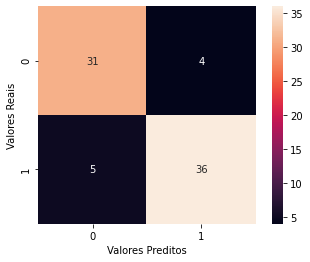

In [0]:
import matplotlib.pyplot as plt

mat_bayes = confusion_matrix(ytest, y_model_bayes)
sns.heatmap(mat_bayes, square=True, annot=True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

### Decision Tree

Text(83.40000000000006, 0.5, 'Valores Reais')

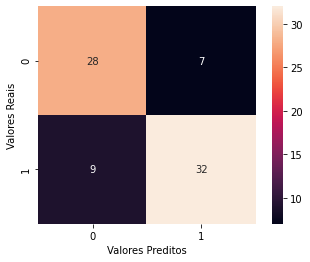

In [0]:
mat_decisiont = confusion_matrix(ytest, y_model_decisiont)
sns.heatmap(mat_decisiont, square=True, annot=True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')